# 3-way Opinion Dynamics

This notebook has all the symbolic computations for the 3-way interaction opinion dynamics paper using sympy. Use the _printlatex_ function to copy the the input in latex format to the clipboard. Based on the paper "Jakob Hansen and Robert Ghrist. Opinion dynamics on discourse sheaves. _SIAM Journal on
Applied Mathematics_, 81(5):2033–2060, 2021". Below we attach the original graph of 3 people interacting and our extended version to account for the 3-way interaction.

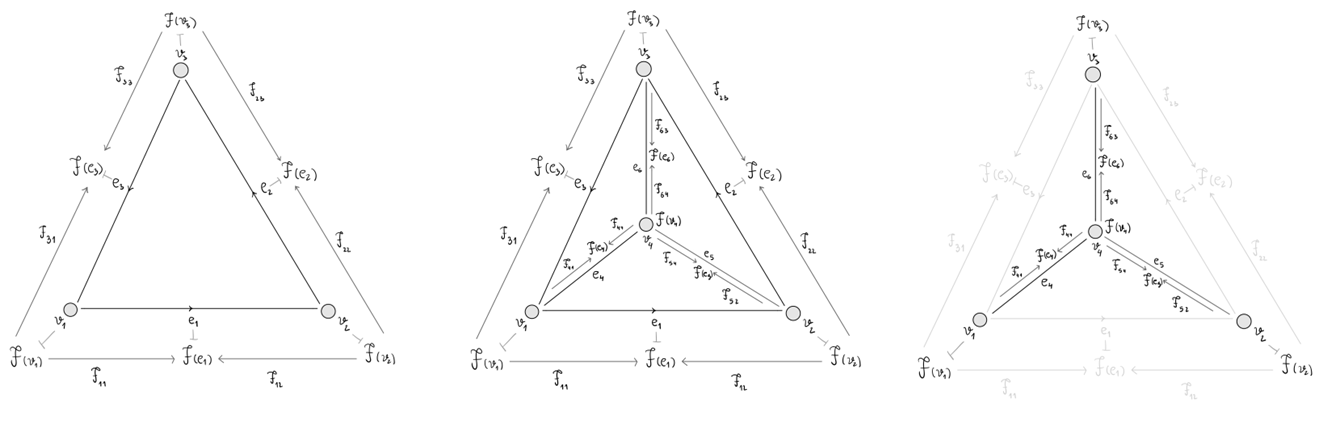

In [337]:
import sympy as sp
from IPython.display import display, Markdown
from sympy import Matrix, I, latex
import pyperclip

In [338]:
# Define some useful functions for rendering
def printmult(lst):
    """
    Allows you to print multiple rendered stuff next to each other
    From https://stackoverflow.com/questions/72682055/render-multiple-equations-symbols-side-by-side-in-jupyter
    """
    output = ""
    for l in lst:
        if isinstance(l, str):
            output += f"{l}"
        else:
            output += f"${{{latex(l)}}}$ "

    display(Markdown(output))

def printlatex(str):
    """
    Prints and copy to clipboard the latex code with round brackets
    """
    str = latex(str, mat_delim='(', mat_str='array')
    print(str)
    pyperclip.copy(str)


We start with the simplest case, 3 nodes, 3 edges, and all the stalks are $\mathbb{R}$.

In [339]:
# define de symbolic variables
a11, a12, a22, a23, a31, a33, a1, a2, a3, b1, b2, b3, beta, x1, x2, x3, x4 = \
    sp.symbols('a11, a12, a22, a23, a31, a33, a1, a2, a3, b1, b2, b3, beta, x1, x2, x3, x4')

In [340]:
# define coboundary matrix delta for the initial graph
delta = sp.Matrix([
    [a11, -a12, 0],
    [0, a22, -a23],
    [-a31, 0, a33]
])
# define coboundary matrix delta for the extended graph
delta_t = sp.Matrix([
    [a11, -a12, 0, 0],
    [0, a22, -a23, 0],
    [-a31, 0, a33, 0],
    [a1, 0, 0, -b1],
    [0, a2, 0, -b2],
    [0, 0, a3, -b3]
])
# print the results
printmult(["$\delta = $ ", delta, r", $\quad \tilde{\delta} = $ ", delta_t])

$\delta = $ ${\left[\begin{matrix}a_{11} & - a_{12} & 0\\0 & a_{22} & - a_{23}\\- a_{31} & 0 & a_{33}\end{matrix}\right]}$ , $\quad \tilde{\delta} = $ ${\left[\begin{matrix}a_{11} & - a_{12} & 0 & 0\\0 & a_{22} & - a_{23} & 0\\- a_{31} & 0 & a_{33} & 0\\a_{1} & 0 & 0 & - b_{1}\\0 & a_{2} & 0 & - b_{2}\\0 & 0 & a_{3} & - b_{3}\end{matrix}\right]}$ 

In [341]:
# compute the laplacians
lap = delta.T@delta
lap_t = delta_t.T@delta_t
# print the results
printmult(["$\mathcal{L} = $ ", lap, ", $\quad \\tilde{\mathcal{L}} = $ ", lap_t])

$\mathcal{L} = $ ${\left[\begin{matrix}a_{11}^{2} + a_{31}^{2} & - a_{11} a_{12} & - a_{31} a_{33}\\- a_{11} a_{12} & a_{12}^{2} + a_{22}^{2} & - a_{22} a_{23}\\- a_{31} a_{33} & - a_{22} a_{23} & a_{23}^{2} + a_{33}^{2}\end{matrix}\right]}$ , $\quad \tilde{\mathcal{L}} = $ ${\left[\begin{matrix}a_{1}^{2} + a_{11}^{2} + a_{31}^{2} & - a_{11} a_{12} & - a_{31} a_{33} & - a_{1} b_{1}\\- a_{11} a_{12} & a_{12}^{2} + a_{2}^{2} + a_{22}^{2} & - a_{22} a_{23} & - a_{2} b_{2}\\- a_{31} a_{33} & - a_{22} a_{23} & a_{23}^{2} + a_{3}^{2} + a_{33}^{2} & - a_{3} b_{3}\\- a_{1} b_{1} & - a_{2} b_{2} & - a_{3} b_{3} & b_{1}^{2} + b_{2}^{2} + b_{3}^{2}\end{matrix}\right]}$ 

In [342]:
# compute the determinant to see if we can get a nontrivial nullspace
det = lap.det().factor()
# in this case it is the square of the determinant of delta (both kernels are the same by Hodge Theorem)
printmult(["$\det \mathcal{L} = $ ", det])

$\det \mathcal{L} = $ ${\left(a_{11} a_{22} a_{33} - a_{12} a_{23} a_{31}\right)^{2}}$ 

We make the appropriate substitutions to have a nontrivial kernel (so nontrivial global sections), to have nontrivial convergence under the heat equation.

In [343]:
# substitute to make the previous determinant zero
lap_sup = lap.subs({a31: a1, a11:a1, a12: a2, a22:a2, a23:a3, a33:a3})
# print resulting laplacian
printmult(["$\mathcal{L} = $ ", lap_sup])

$\mathcal{L} = $ ${\left[\begin{matrix}2 a_{1}^{2} & - a_{1} a_{2} & - a_{1} a_{3}\\- a_{1} a_{2} & 2 a_{2}^{2} & - a_{2} a_{3}\\- a_{1} a_{3} & - a_{2} a_{3} & 2 a_{3}^{2}\end{matrix}\right]}$ 

In [344]:
# compute its kernel
ker_lap = a1*a2*lap_sup.nullspace()[0]
printmult(["$\ker \mathcal{L} = $ ", ker_lap])

$\ker \mathcal{L} = $ ${\left[\begin{matrix}a_{2} a_{3}\\a_{1} a_{3}\\a_{1} a_{2}\end{matrix}\right]}$ 

In [385]:
# eigenvalues
for i, l in enumerate(list(lap_sup.eigenvals().keys())):
    printmult(["$\lambda_{} = $ ".format(i), l])

$\lambda_0 = $ ${a_{1}^{2} + a_{2}^{2} + a_{3}^{2} - \sqrt{a_{1}^{4} - a_{1}^{2} a_{2}^{2} - a_{1}^{2} a_{3}^{2} + a_{2}^{4} - a_{2}^{2} a_{3}^{2} + a_{3}^{4}}}$ 

$\lambda_1 = $ ${a_{1}^{2} + a_{2}^{2} + a_{3}^{2} + \sqrt{a_{1}^{4} - a_{1}^{2} a_{2}^{2} - a_{1}^{2} a_{3}^{2} + a_{2}^{4} - a_{2}^{2} a_{3}^{2} + a_{3}^{4}}}$ 

$\lambda_2 = $ ${0}$ 

In [345]:
# check the effects of these substitutions on the extended laplacian
lap_t_sup = lap_t.subs({a31: a1, a11:a1, a12: a2, a22:a2, a23:a3, a33:a3})
printmult(["$\\tilde{\mathcal{L}} = $ ", lap_t_sup])

$\tilde{\mathcal{L}} = $ ${\left[\begin{matrix}3 a_{1}^{2} & - a_{1} a_{2} & - a_{1} a_{3} & - a_{1} b_{1}\\- a_{1} a_{2} & 3 a_{2}^{2} & - a_{2} a_{3} & - a_{2} b_{2}\\- a_{1} a_{3} & - a_{2} a_{3} & 3 a_{3}^{2} & - a_{3} b_{3}\\- a_{1} b_{1} & - a_{2} b_{2} & - a_{3} b_{3} & b_{1}^{2} + b_{2}^{2} + b_{3}^{2}\end{matrix}\right]}$ 

$\tilde{\mathcal{L}}$ still has a trivial kernel, so runnning the heat equation will make converge any initial condition to 0. We check again the determinant to learn what choices of $b1,b_2,b_3$ make the determinant 0.

In [346]:
det_lap_t_sup = lap_t_sup.det().factor()
printmult(["$\det \\tilde{\mathcal{L}} = $ ", det_lap_t_sup])

$\det \tilde{\mathcal{L}} = $ ${8 a_{1}^{2} a_{2}^{2} a_{3}^{2} \left(b_{1}^{2} - b_{1} b_{2} - b_{1} b_{3} + b_{2}^{2} - b_{2} b_{3} + b_{3}^{2}\right)}$ 

One can show $\det \tilde{\mathcal{L}} = 0 \iff b_1=b_2=b_3$, so we make that substitution.

In [347]:
lap_t_sup_sup = lap_t_sup.subs({b1: beta, b2: beta, b3:beta})
printmult(["$\\tilde{\mathcal{L}} = $ ", lap_t_sup_sup])

$\tilde{\mathcal{L}} = $ ${\left[\begin{matrix}3 a_{1}^{2} & - a_{1} a_{2} & - a_{1} a_{3} & - a_{1} \beta\\- a_{1} a_{2} & 3 a_{2}^{2} & - a_{2} a_{3} & - a_{2} \beta\\- a_{1} a_{3} & - a_{2} a_{3} & 3 a_{3}^{2} & - a_{3} \beta\\- a_{1} \beta & - a_{2} \beta & - a_{3} \beta & 3 \beta^{2}\end{matrix}\right]}$ 

In [348]:
ker_lap_t = a1*a2*a3*lap_t_sup_sup.nullspace()[0]
printmult(["$\ker \\tilde{\mathcal{L}} = $ ", ker_lap_t])

$\ker \tilde{\mathcal{L}} = $ ${\left[\begin{matrix}a_{2} a_{3} \beta\\a_{1} a_{3} \beta\\a_{1} a_{2} \beta\\a_{1} a_{2} a_{3}\end{matrix}\right]}$ 

We create the vector of initial conditions $x$ and compute its orthogonal projection to the kernel of the laplcian.

In [349]:
# initial condition symbolic vector
x = sp.Matrix([[x1],[x2],[x3]]) # for the original graph
x_t = sp.Matrix([[x1],[x2],[x3],[x4]]) # for the extended graph

In [350]:
# orthogonal projection matrix. We first normalize the generating vector and then compute its outer product
ort = sp.matrices.dense.GramSchmidt([ker_lap], orthonormal=True)[0] # orthonormalization
P = ort@ort.T # orthogonal projection matrix
x_inf = P@x # orthogonal projection of the initial conditions
printmult(["$x_\infty = $ ",x_inf])

$x_\infty = $ ${\left[\begin{matrix}\frac{a_{1} a_{2}^{2} a_{3} x_{3}}{\left|{a_{1} a_{2}}\right|^{2} + \left|{a_{1} a_{3}}\right|^{2} + \left|{a_{2} a_{3}}\right|^{2}} + \frac{a_{1} a_{2} a_{3}^{2} x_{2}}{\left|{a_{1} a_{2}}\right|^{2} + \left|{a_{1} a_{3}}\right|^{2} + \left|{a_{2} a_{3}}\right|^{2}} + \frac{a_{2}^{2} a_{3}^{2} x_{1}}{\left|{a_{1} a_{2}}\right|^{2} + \left|{a_{1} a_{3}}\right|^{2} + \left|{a_{2} a_{3}}\right|^{2}}\\\frac{a_{1}^{2} a_{2} a_{3} x_{3}}{\left|{a_{1} a_{2}}\right|^{2} + \left|{a_{1} a_{3}}\right|^{2} + \left|{a_{2} a_{3}}\right|^{2}} + \frac{a_{1}^{2} a_{3}^{2} x_{2}}{\left|{a_{1} a_{2}}\right|^{2} + \left|{a_{1} a_{3}}\right|^{2} + \left|{a_{2} a_{3}}\right|^{2}} + \frac{a_{1} a_{2} a_{3}^{2} x_{1}}{\left|{a_{1} a_{2}}\right|^{2} + \left|{a_{1} a_{3}}\right|^{2} + \left|{a_{2} a_{3}}\right|^{2}}\\\frac{a_{1}^{2} a_{2}^{2} x_{3}}{\left|{a_{1} a_{2}}\right|^{2} + \left|{a_{1} a_{3}}\right|^{2} + \left|{a_{2} a_{3}}\right|^{2}} + \frac{a_{1}^{2} a_{2} a_{3} x_{2}}{\left|{a_{1} a_{2}}\right|^{2} + \left|{a_{1} a_{3}}\right|^{2} + \left|{a_{2} a_{3}}\right|^{2}} + \frac{a_{1} a_{2}^{2} a_{3} x_{1}}{\left|{a_{1} a_{2}}\right|^{2} + \left|{a_{1} a_{3}}\right|^{2} + \left|{a_{2} a_{3}}\right|^{2}}\end{matrix}\right]}$ 

In [351]:
# orthogonal projection matrix. We first normalize the generating vector and then compute its outer product
ort_t = sp.matrices.dense.GramSchmidt([ker_lap_t], orthonormal=True)[0] # orthonormalization
P_t = ort_t@ort_t.T # orthogonal projection matrix
x_t_inf = P_t@x_t # orthogonal projection of the initial conditions
printmult(["$\\tilde{x}_\infty = $ ",x_t_inf])

$\tilde{x}_\infty = $ ${\left[\begin{matrix}\frac{a_{1} a_{2}^{2} a_{3}^{2} \beta x_{4}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} \beta}\right|^{2} + \left|{a_{1} a_{3} \beta}\right|^{2} + \left|{a_{2} a_{3} \beta}\right|^{2}} + \frac{a_{1} a_{2}^{2} a_{3} \beta^{2} x_{3}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} \beta}\right|^{2} + \left|{a_{1} a_{3} \beta}\right|^{2} + \left|{a_{2} a_{3} \beta}\right|^{2}} + \frac{a_{1} a_{2} a_{3}^{2} \beta^{2} x_{2}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} \beta}\right|^{2} + \left|{a_{1} a_{3} \beta}\right|^{2} + \left|{a_{2} a_{3} \beta}\right|^{2}} + \frac{a_{2}^{2} a_{3}^{2} \beta^{2} x_{1}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} \beta}\right|^{2} + \left|{a_{1} a_{3} \beta}\right|^{2} + \left|{a_{2} a_{3} \beta}\right|^{2}}\\\frac{a_{1}^{2} a_{2} a_{3}^{2} \beta x_{4}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} \beta}\right|^{2} + \left|{a_{1} a_{3} \beta}\right|^{2} + \left|{a_{2} a_{3} \beta}\right|^{2}} + \frac{a_{1}^{2} a_{2} a_{3} \beta^{2} x_{3}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} \beta}\right|^{2} + \left|{a_{1} a_{3} \beta}\right|^{2} + \left|{a_{2} a_{3} \beta}\right|^{2}} + \frac{a_{1}^{2} a_{3}^{2} \beta^{2} x_{2}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} \beta}\right|^{2} + \left|{a_{1} a_{3} \beta}\right|^{2} + \left|{a_{2} a_{3} \beta}\right|^{2}} + \frac{a_{1} a_{2} a_{3}^{2} \beta^{2} x_{1}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} \beta}\right|^{2} + \left|{a_{1} a_{3} \beta}\right|^{2} + \left|{a_{2} a_{3} \beta}\right|^{2}}\\\frac{a_{1}^{2} a_{2}^{2} a_{3} \beta x_{4}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} \beta}\right|^{2} + \left|{a_{1} a_{3} \beta}\right|^{2} + \left|{a_{2} a_{3} \beta}\right|^{2}} + \frac{a_{1}^{2} a_{2}^{2} \beta^{2} x_{3}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} \beta}\right|^{2} + \left|{a_{1} a_{3} \beta}\right|^{2} + \left|{a_{2} a_{3} \beta}\right|^{2}} + \frac{a_{1}^{2} a_{2} a_{3} \beta^{2} x_{2}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} \beta}\right|^{2} + \left|{a_{1} a_{3} \beta}\right|^{2} + \left|{a_{2} a_{3} \beta}\right|^{2}} + \frac{a_{1} a_{2}^{2} a_{3} \beta^{2} x_{1}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} \beta}\right|^{2} + \left|{a_{1} a_{3} \beta}\right|^{2} + \left|{a_{2} a_{3} \beta}\right|^{2}}\\\frac{a_{1}^{2} a_{2}^{2} a_{3}^{2} x_{4}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} \beta}\right|^{2} + \left|{a_{1} a_{3} \beta}\right|^{2} + \left|{a_{2} a_{3} \beta}\right|^{2}} + \frac{a_{1}^{2} a_{2}^{2} a_{3} \beta x_{3}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} \beta}\right|^{2} + \left|{a_{1} a_{3} \beta}\right|^{2} + \left|{a_{2} a_{3} \beta}\right|^{2}} + \frac{a_{1}^{2} a_{2} a_{3}^{2} \beta x_{2}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} \beta}\right|^{2} + \left|{a_{1} a_{3} \beta}\right|^{2} + \left|{a_{2} a_{3} \beta}\right|^{2}} + \frac{a_{1} a_{2}^{2} a_{3}^{2} \beta x_{1}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} \beta}\right|^{2} + \left|{a_{1} a_{3} \beta}\right|^{2} + \left|{a_{2} a_{3} \beta}\right|^{2}}\end{matrix}\right]}$ 

We normalize according to $\left|{a_{1} a_{2}}\right|^{2} + \left|{a_{1} a_{3}}\right|^{2} + \left|{a_{2} a_{3}}\right|^{2} = 1$ to get nicer looking results. To finalize our analysis we study the case where only the 3-way interaction happens, the rightmost diagram of the initial picture.

In [363]:
# define coboundary matrix delta for the interior graph
delta_h = sp.Matrix([
    [a1, 0, 0, -b1],
    [0, a2, 0, -b2],
    [0, 0, a3, -b3]
])
# compute the laplacians
lap_h = delta_h.T@delta_h
# kernel of the laplacian
ker_lap_h = a1*a2*a3*lap_h.nullspace()[0]
# print the results
printmult(["$\hat{\delta} = $ ", delta_h, r", $\quad \hat{\mathcal{L}} = $ ", lap_h, ", $\ker\hat{\mathcal{L}} = $ ", ker_lap_h])

$\hat{\delta} = $ ${\left[\begin{matrix}a_{1} & 0 & 0 & - b_{1}\\0 & a_{2} & 0 & - b_{2}\\0 & 0 & a_{3} & - b_{3}\end{matrix}\right]}$ , $\quad \hat{\mathcal{L}} = $ ${\left[\begin{matrix}a_{1}^{2} & 0 & 0 & - a_{1} b_{1}\\0 & a_{2}^{2} & 0 & - a_{2} b_{2}\\0 & 0 & a_{3}^{2} & - a_{3} b_{3}\\- a_{1} b_{1} & - a_{2} b_{2} & - a_{3} b_{3} & b_{1}^{2} + b_{2}^{2} + b_{3}^{2}\end{matrix}\right]}$ , $\ker\hat{\mathcal{L}} = $ ${\left[\begin{matrix}a_{2} a_{3} b_{1}\\a_{1} a_{3} b_{2}\\a_{1} a_{2} b_{3}\\a_{1} a_{2} a_{3}\end{matrix}\right]}$ 

You can see that under the assumption that $b_1 = b_2 = b_3 = \beta$ we get the same result as in the extended graph.

In [364]:
# orthogonal projection matrix. We first normalize the generating vector and then compute its outer product
ort_h = sp.matrices.dense.GramSchmidt([ker_lap_h], orthonormal=True)[0] # orthonormalization
P_h = ort_h@ort_h.T # orthogonal projection matrix
x_inf_h = P_h@x_t # orthogonal projection of the initial conditions
printmult(["$\hat{x}_\infty = $ ",x_inf_h])

$\hat{x}_\infty = $ ${\left[\begin{matrix}\frac{a_{1} a_{2}^{2} a_{3}^{2} b_{1} x_{4}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} b_{3}}\right|^{2} + \left|{a_{1} a_{3} b_{2}}\right|^{2} + \left|{a_{2} a_{3} b_{1}}\right|^{2}} + \frac{a_{1} a_{2}^{2} a_{3} b_{1} b_{3} x_{3}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} b_{3}}\right|^{2} + \left|{a_{1} a_{3} b_{2}}\right|^{2} + \left|{a_{2} a_{3} b_{1}}\right|^{2}} + \frac{a_{1} a_{2} a_{3}^{2} b_{1} b_{2} x_{2}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} b_{3}}\right|^{2} + \left|{a_{1} a_{3} b_{2}}\right|^{2} + \left|{a_{2} a_{3} b_{1}}\right|^{2}} + \frac{a_{2}^{2} a_{3}^{2} b_{1}^{2} x_{1}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} b_{3}}\right|^{2} + \left|{a_{1} a_{3} b_{2}}\right|^{2} + \left|{a_{2} a_{3} b_{1}}\right|^{2}}\\\frac{a_{1}^{2} a_{2} a_{3}^{2} b_{2} x_{4}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} b_{3}}\right|^{2} + \left|{a_{1} a_{3} b_{2}}\right|^{2} + \left|{a_{2} a_{3} b_{1}}\right|^{2}} + \frac{a_{1}^{2} a_{2} a_{3} b_{2} b_{3} x_{3}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} b_{3}}\right|^{2} + \left|{a_{1} a_{3} b_{2}}\right|^{2} + \left|{a_{2} a_{3} b_{1}}\right|^{2}} + \frac{a_{1}^{2} a_{3}^{2} b_{2}^{2} x_{2}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} b_{3}}\right|^{2} + \left|{a_{1} a_{3} b_{2}}\right|^{2} + \left|{a_{2} a_{3} b_{1}}\right|^{2}} + \frac{a_{1} a_{2} a_{3}^{2} b_{1} b_{2} x_{1}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} b_{3}}\right|^{2} + \left|{a_{1} a_{3} b_{2}}\right|^{2} + \left|{a_{2} a_{3} b_{1}}\right|^{2}}\\\frac{a_{1}^{2} a_{2}^{2} a_{3} b_{3} x_{4}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} b_{3}}\right|^{2} + \left|{a_{1} a_{3} b_{2}}\right|^{2} + \left|{a_{2} a_{3} b_{1}}\right|^{2}} + \frac{a_{1}^{2} a_{2}^{2} b_{3}^{2} x_{3}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} b_{3}}\right|^{2} + \left|{a_{1} a_{3} b_{2}}\right|^{2} + \left|{a_{2} a_{3} b_{1}}\right|^{2}} + \frac{a_{1}^{2} a_{2} a_{3} b_{2} b_{3} x_{2}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} b_{3}}\right|^{2} + \left|{a_{1} a_{3} b_{2}}\right|^{2} + \left|{a_{2} a_{3} b_{1}}\right|^{2}} + \frac{a_{1} a_{2}^{2} a_{3} b_{1} b_{3} x_{1}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} b_{3}}\right|^{2} + \left|{a_{1} a_{3} b_{2}}\right|^{2} + \left|{a_{2} a_{3} b_{1}}\right|^{2}}\\\frac{a_{1}^{2} a_{2}^{2} a_{3}^{2} x_{4}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} b_{3}}\right|^{2} + \left|{a_{1} a_{3} b_{2}}\right|^{2} + \left|{a_{2} a_{3} b_{1}}\right|^{2}} + \frac{a_{1}^{2} a_{2}^{2} a_{3} b_{3} x_{3}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} b_{3}}\right|^{2} + \left|{a_{1} a_{3} b_{2}}\right|^{2} + \left|{a_{2} a_{3} b_{1}}\right|^{2}} + \frac{a_{1}^{2} a_{2} a_{3}^{2} b_{2} x_{2}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} b_{3}}\right|^{2} + \left|{a_{1} a_{3} b_{2}}\right|^{2} + \left|{a_{2} a_{3} b_{1}}\right|^{2}} + \frac{a_{1} a_{2}^{2} a_{3}^{2} b_{1} x_{1}}{\left|{a_{1} a_{2} a_{3}}\right|^{2} + \left|{a_{1} a_{2} b_{3}}\right|^{2} + \left|{a_{1} a_{3} b_{2}}\right|^{2} + \left|{a_{2} a_{3} b_{1}}\right|^{2}}\end{matrix}\right]}$ 